# Artificial Neural Networks (ANN)

(If the reader wants to try this notebook, I recomend using google colab because of the datasets and environment configuration)

## Multi-class Classification using MLP with Error Backpropagation

**Multi-class classification** refers to problems where the goal is to assign an input to one of several possible categories, rather than a simple yes/no decision. Examples include recognizing which digit (0–9) is written, identifying which species a flower belongs to, or deciding whether an image shows a cat, dog, horse, or bird.

An **MLP (Multilayer Perceptron)** is a type of neural network composed of an input layer, one or more hidden layers, and an output layer where each neuron represents a class. The MLP learns patterns in the data by adjusting the strength of the connections (weights) between neurons.

**Error backpropagation** is the algorithm used to train the MLP. After making a prediction, the network computes the error between the predicted and correct labels. This error is then propagated backward through the network, and the weights are updated in a way that reduces this error in future predictions. This iterative process is how the model gradually learns to classify correctly.

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd

## Data Exploration

In [2]:
# Import the dataset Iris from sklearn.datasets
from sklearn import datasets
iris = datasets.load_iris()
print("Targets labels are: ",iris.target_names)
print("Target values are: ",np.unique(iris.target))


Targets labels are:  ['setosa' 'versicolor' 'virginica']
Target values are:  [0 1 2]


In [3]:

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target column
df["target"] = iris.target

# Now you can use head()
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [5]:
# Separate Iris data into 2 data frames: X (data) and y (targets).
X = pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal lenghth','petal width'])
y = pd.DataFrame(iris['target'],columns=['target'])

print("Size of input features : ", X.shape)
print("Size of output targets : ", y.shape)

# Defining number of features and targes - used at the network initialisatiom
Nfeatures = X.shape[1]
print(f"Number of input features = ",Nfeatures)
Ntargets = len(y['target'].unique())
print("Number of output targets = ",Ntargets)



Size of input features :  (150, 4)
Size of output targets :  (150, 1)
Number of input features =  4
Number of output targets =  3


## Train and test split

In [6]:
# Split for training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that all classes (y_train) are integers.
for i in range(len(y_train)):
 y_train.iloc[i,0] = int(y_train.iloc[i,0])


In [7]:
# Print the first 5 rows of dataset_train
dataset_train = pd.concat([X_train, y_train], axis=1).values.tolist()
print(f"dataset_train: {dataset_train[0:5][:]}")

dataset_train: [[4.6, 3.6, 1.0, 0.2, 0.0], [5.7, 4.4, 1.5, 0.4, 0.0], [6.7, 3.1, 4.4, 1.4, 1.0], [4.8, 3.4, 1.6, 0.2, 0.0], [4.4, 3.2, 1.3, 0.2, 0.0]]


In [8]:
# Print the first 5 rows of dataset_test
dataset_train = pd.concat([X_test, y_test], axis=1).values.tolist()
print(f"dataset_train: {dataset_train[0:5][:]}")

dataset_train: [[6.1, 2.8, 4.7, 1.2, 1.0], [5.7, 3.8, 1.7, 0.3, 0.0], [7.7, 2.6, 6.9, 2.3, 2.0], [6.0, 2.9, 4.5, 1.5, 1.0], [6.8, 2.8, 4.8, 1.4, 1.0]]


## Network initialisation

### How the Neural Network Is Being Initialized in This Code
**Constructing the structure of a Multilayer Perceptron (MLP):**

1. Input layer = number of features
    - 4 features → 4 input neurons
2. Output layer = number of target outputs
    - 3 classes → 3 output neurons
3. Hidden layer = chosen by the user
     - hyperparameter
     - Each neuron in the hidden layer receives:
        - one weight per input feature
        - plus (+) one extra weight for the bias
    -  Why are the weights random? At the beginning of training, the network must start without any knowledge.

### Weights and Bias

* **Weights determine influence:** Each weight controls how much an input feature contributes to a neuron’s output.
* **Feature importance:** Large weights mean the feature is important; small weights mean the feature has little effect; negative weights invert the influence.
* **Weighted sum:** A neuron computes a weighted sum of its inputs, multiplying each input by its corresponding weight.
* **Bias shifts activation:** The bias is an extra parameter that allows the neuron to shift its activation up or down, enabling correct outputs even when inputs are zero.
* **Learning happens through them:** During training, backpropagation adjusts weights and bias to reduce error and improve predictions.
* **Core purpose:** Together, weights and bias define how the network transforms inputs into outputs and gradually learns underlying patterns in the data.



In [9]:
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()

  # Hidden layer weight config
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)

  # Output layer weigt config
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

seed(1) # It does not matter where seed(1) is written — before or after the function definition — as long as it happens before the function is executed.

Nhidden = int(input('Enter the number of nodes in the hidden layer: '))
network = initialize_network(Nfeatures, Nhidden, Ntargets)
for layer in network:
	print(layer)

Enter the number of nodes in the hidden layer: 2
[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763, 0.7887233511355132, 0.0938595867742349, 0.02834747652200631]}]
[{'weights': [0.8357651039198697, 0.43276706790505337, 0.762280082457942]}, {'weights': [0.0021060533511106927, 0.4453871940548014, 0.7215400323407826]}, {'weights': [0.22876222127045265, 0.9452706955539223, 0.9014274576114836]}]


## Neural activation


The “activation” (the weighted sum + bias) is important because:

* **It is the core calculation that determines how a neuron responds to the input.**
* **Every prediction the network makes is based on this value.**
* **It combines the input features with the learned weights**, showing which features matter and how much.
* **The bias allows the neuron to shift its decision boundary**, giving it flexibility to learn patterns that don’t go through the origin.
* **The activation value is what is passed into the activation function** (sigmoid, ReLU, etc.), which then produces the neuron’s final output.
* **During training, backpropagation adjusts the weights and bias based on this activation**, meaning learning happens directly through this computation.


**This calculation is important because it is the fundamental way a neuron transforms inputs into a learned response.**

---


If a neural network is a brain:

* Inputs = signals
* Weights = the strength of each connection
* Bias = the neuron’s natural tendency to fire
* **Activation = the combined signal that decides whether the neuron should activate or not**

Without this step, **a neural network cannot learn, cannot combine information, and cannot produce meaningful outputs**.


In [10]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

### Sigmoid activation function

The sigmoid function is important because:

* **It converts any number (negative or positive) into a probability-like value between 0 and 1.**
* **It introduces non-linearity**, allowing the network to learn complex patterns instead of just straight lines.
* **It lets the neuron decide “how activated” it should be** — low (close to 0), medium (~0.5), or high (close to 1).
* **It smooths the output**, making gradients stable for backpropagation.
* **It enables the network to combine many neurons into deeper behaviors**, not just linear combinations.

---


* If the activation is very negative → output ≈ 0
* If the activation is zero → output = 0.5
* If the activation is very positive → output ≈ 1

This is why sigmoid is often used for:

* binary classification
* probability outputs
* hidden layers in small teaching networks

---


**The sigmoid transfer function turns a neuron’s weighted sum into a smooth, non-linear output between 0 and 1, which is essential for learning complex patterns.**


In [11]:
# Transfer neuron activation (sigmoid function)
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

## Forward propagation
This function takes an input row and passes it forward through every layer of the network to produce the final output.

In [12]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

In [13]:
# test forward propagation
from math import exp
network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, None]
output = forward_propagate(network, row)
print(output)

[0.6629970129852887, 0.7253160725279748]


## Backpropagation

Backpropagation computes how much each neuron contributed to the final error and stores this value (delta) so the network can update its weights during training.

In [14]:
# Error Backrpopagation
# Step1: Calculate the derivative of the activation function d(sig(x))/dx=sig(x)(1-sig(x))
def transfer_derivative(output):
	return output * (1.0 - output)

In [15]:
# Step 2: Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [16]:
# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': 0.0005348048046610517}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': 0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': -0.0771723774346327}]


## Training the Network

In [17]:
# Train the network
# Step1: Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

In [18]:
# Step 2: Train a network for a fixed number of epochs (iterations for each batch)
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[int(row[-1])] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

An epoch is one full pass through the entire training dataset.

For each epoch:

1. Loop over every row in the training set

2. Do a forward pass → get predictions

3. Build the expected output vector (one-hot)

4. Compute the error

5. Run backpropagation → compute deltas

6. Call update_weights → change the weights

7. At the end of the epoch, print total error




# Summary version

### Train and Test Split

In [19]:
from sklearn.model_selection import train_test_split

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range(len(y_train)):
  y_train.iloc[i,0] = int(y_train.iloc[i,0])

# Normalization
X_train_Norm = (X_train-X_train.min())/(X_train.max()-X_train.min())
X_test_Norm = (X_test-X_test.min())/(X_test.max()-X_test.min())

# Print the first 5 rows of dataset_train and dataset_test
dataset_train = pd.concat([X_train_Norm, y_train], axis=1).values.tolist()
print(f"dataset_train: {dataset_train[0:5][:]}")
dataset_test = pd.concat([X_test_Norm, y_test], axis=1).values.tolist()
print(f"dataset_test: {dataset_test[0:5][:]}")


dataset_train: [[0.088235294117647, 0.6666666666666666, 0.0, 0.04166666666666667, 0.0], [0.411764705882353, 1.0, 0.08771929824561403, 0.12500000000000003, 0.0], [0.7058823529411765, 0.4583333333333333, 0.5964912280701755, 0.5416666666666666, 1.0], [0.14705882352941174, 0.5833333333333333, 0.10526315789473685, 0.04166666666666667, 0.0], [0.029411764705882505, 0.5, 0.052631578947368425, 0.04166666666666667, 0.0]]
dataset_test: [[0.43749999999999983, 0.37499999999999983, 0.6071428571428571, 0.5, 1.0], [0.3125, 1.0, 0.07142857142857141, 0.09090909090909091, 0.0], [0.9375, 0.25, 1.0, 1.0, 2.0], [0.40624999999999994, 0.43749999999999994, 0.5714285714285714, 0.6363636363636364, 1.0], [0.6562499999999999, 0.37499999999999983, 0.6249999999999999, 0.5909090909090909, 1.0]]


## Network Initialization

In [20]:
# Network initialisation
n_hidden = int(input('Enter the number of nodes in the hidden layer: '))
n_inputs = len(dataset_train[0]) - 1
n_outputs = len(y_train.value_counts())
print(f"number of input features = {n_inputs}")
print(f"number of output labels = {n_outputs}")
print(f"number of nodes in the hidden layer = {n_hidden}")
network = initialize_network(n_inputs, n_hidden, n_outputs)
print(f"Initial network weights: {network}")


Enter the number of nodes in the hidden layer: 2
number of input features = 4
number of output labels = 3
number of nodes in the hidden layer = 2
Initial network weights: [[{'weights': [0.030589983033553536, 0.0254458609934608, 0.5414124727934966, 0.9391491627785106, 0.38120423768821243]}, {'weights': [0.21659939713061338, 0.4221165755827173, 0.029040787574867943, 0.22169166627303505, 0.43788759365057206]}], [{'weights': [0.49581224138185065, 0.23308445025757263, 0.2308665415409843]}, {'weights': [0.2187810373376886, 0.4596034657377336, 0.28978161459048557]}, {'weights': [0.021489705265908876, 0.8375779756625729, 0.5564543226524334]}]]


In [21]:
# Network training
sum_error = 0
l_rate = float(input('Enter the learning rate (between 0 and 1): '))
n_epoch = int(input('Enter the number of epochs: '))
print(f"Selected learning rate = {l_rate}")
print(f"Selected number of epochs = {n_epoch}")
train_network(network, dataset_train, l_rate, n_epoch, n_outputs)


Enter the learning rate (between 0 and 1): 0.5
Enter the number of epochs: 10
Selected learning rate = 0.5
Selected number of epochs = 10
>epoch=0, lrate=0.500, error=87.401
>epoch=1, lrate=0.500, error=82.297
>epoch=2, lrate=0.500, error=80.466
>epoch=3, lrate=0.500, error=76.037
>epoch=4, lrate=0.500, error=67.134
>epoch=5, lrate=0.500, error=57.215
>epoch=6, lrate=0.500, error=50.636
>epoch=7, lrate=0.500, error=46.895
>epoch=8, lrate=0.500, error=44.582
>epoch=9, lrate=0.500, error=42.930


Here we can see the error decreasing for each epoch.
If you have 150 samples and train for 10 epochs, backpropagation will run 150 × 10 = 1500 times.

In [22]:
# Use the NN model for prediction
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

In [23]:
# Test making predictions with the network
print(f"final networks: {network}")
target = prediction = np.zeros(len(dataset_test))
for i in range(len(dataset_test)):
  row = dataset_test[i][:]
  print(row)
  target[i]=int(dataset_test[i][-1])
  prediction[i] = predict(network, row)

print("targets= ", target)
print("predictions= ", prediction)


final networks: [[{'weights': [0.7488033837327234, -2.0977546038377892, 2.577342409744158, 2.998661103515608, -1.5676564249448086], 'output': 0.9471220565549432, 'delta': -0.002431163176728404}, {'weights': [0.7128770224729291, -1.0369294983382022, 1.478695171936217, 1.919956625313801, -1.7033434707240593], 'output': 0.782669017089322, 'delta': -0.02527183948419988}], [{'weights': [-4.342570453440658, -2.009580579585761, 2.22392518401644], 'output': 0.030450548895676676, 'delta': 0.0008990010850831424}, {'weights': [1.1305005204024317, -0.11008981405486358, -1.3423032888783264], 'output': 0.4452873180175505, 'delta': 0.10998887190582458}, {'weights': [2.564377978889224, 2.046886439619367, -3.1818388260485175], 'output': 0.6818704551771959, 'delta': -0.06900965900511129}]]
[0.43749999999999983, 0.37499999999999983, 0.6071428571428571, 0.5, 1.0]
[0.3125, 1.0, 0.07142857142857141, 0.09090909090909091, 0.0]
[0.9375, 0.25, 1.0, 1.0, 2.0]
[0.40624999999999994, 0.43749999999999994, 0.57142857

In [24]:
# Evaluate NN model
#from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
print(f"Confusion matrix: \n {confusion_matrix(target, prediction)}")
print(f"Classification_report: \n {classification_report(target, prediction)}")

Confusion matrix: 
 [[10  0  0]
 [ 0  1  0]
 [ 0  0 19]]
Classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Exercises

##  #1- Binary classification using MLP with predefined functions and grid search

In [25]:
# Upload play_tennis.csv dataset

from google.colab import files
uploaded = files.upload()

Saving play_tennis.csv to play_tennis.csv


In [26]:
df_tennis = pd.read_csv('play_tennis.csv')
df_tennis.head()

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,85,85,Weak,No
1,D2,Sunny,80,90,Strong,Yes
2,D3,Overcast,83,78,Weak,Yes
3,D4,Rain,70,96,Weak,Yes
4,D5,Rain,68,80,Weak,No


In [30]:
df_tennis['Outlook'] = df_tennis['Outlook'].replace({'Sunny': 0, 'Overcast': 0.5, 'Rain': 1})
df_tennis['Wind'] = df_tennis['Wind'].replace({'Weak': 0, 'Strong': 1})
df_tennis['PlayTennis'] = df_tennis['PlayTennis'].replace({'No': 0, 'Yes': 1})

In [32]:
# Normalize numerical columns using min-max normalization
df_tennis['Temperature'] = (df_tennis['Temperature'] - df_tennis['Temperature'].min()) / (df_tennis['Temperature'].max() - df_tennis['Temperature'].min())
df_tennis['Humidity'] = (df_tennis['Humidity'] - df_tennis['Humidity'].min()) / (df_tennis['Humidity'].max() - df_tennis['Humidity'].min())
df_tennis['Wind'] = (df_tennis['Wind'] - df_tennis['Wind'].min()) / (df_tennis['Wind'].max() - df_tennis['Wind'].min())
df_tennis['Outlook'] = (df_tennis['Wind'] - df_tennis['Wind'].min()) / (df_tennis['Wind'].max() - df_tennis['Wind'].min())


display(df_tennis.head())

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,0.0,0.833333,0.738095,0.0,0
1,D2,1.0,0.714286,0.857143,1.0,1
2,D3,0.0,0.785714,0.571429,0.0,1
3,D4,0.0,0.476190,1.000000,0.0,1
4,D5,0.0,0.428571,0.619048,0.0,0


In [40]:
X = df_tennis.drop(['PlayTennis','Day'], axis=1)
y = df_tennis['PlayTennis']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (279, 4)
y_train: (279,)
X_test: (120, 4)
y_test: (120,)


In [48]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(200, 100),
    max_iter=300,
    activation='relu',
    solver='sgd',
    learning_rate='constant',
    learning_rate_init=0.001,
    batch_size='auto',
    tol=0.00001,
    verbose=True
)

In [49]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.71527590
Iteration 2, loss = 0.71476456
Iteration 3, loss = 0.71395932
Iteration 4, loss = 0.71289688
Iteration 5, loss = 0.71171721
Iteration 6, loss = 0.71044400
Iteration 7, loss = 0.70900443
Iteration 8, loss = 0.70754332
Iteration 9, loss = 0.70606575
Iteration 10, loss = 0.70460869
Iteration 11, loss = 0.70311519
Iteration 12, loss = 0.70168047
Iteration 13, loss = 0.70024827
Iteration 14, loss = 0.69898831
Iteration 15, loss = 0.69778946
Iteration 16, loss = 0.69635911
Iteration 17, loss = 0.69518236
Iteration 18, loss = 0.69415035
Iteration 19, loss = 0.69326663
Iteration 20, loss = 0.69211543
Iteration 21, loss = 0.69114606
Iteration 22, loss = 0.69030145
Iteration 23, loss = 0.68946067
Iteration 24, loss = 0.68859888
Iteration 25, loss = 0.68792380
Iteration 26, loss = 0.68715506
Iteration 27, loss = 0.68643246
Iteration 28, loss = 0.68579727
Iteration 29, loss = 0.68521545
Iteration 30, loss = 0.68461610
Iteration 31, loss = 0.68404307
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=300, solver='sgd',
              tol=1e-05, verbose=True)

In [50]:
print(mlp.coefs_)

[array([[-0.02732585, -0.09056323, -0.07237039, -0.15107439,  0.04339126,
         0.16257466,  0.00757296, -0.11130465, -0.09157268,  0.02397188,
         0.01805552, -0.01448218, -0.00709954,  0.13302637, -0.09952539,
         0.02899101,  0.01119568, -0.10823608, -0.10154742, -0.02558618,
         0.06907145,  0.12277515, -0.01157087, -0.12304106,  0.01579854,
         0.11997777,  0.03545561, -0.06746587, -0.06012026,  0.04025762,
        -0.13733325, -0.08296456, -0.10862403,  0.16224773,  0.05163135,
        -0.08434853, -0.05261878,  0.13830692, -0.06311231,  0.01262771,
        -0.14322726, -0.03616771,  0.02954899,  0.06183046, -0.07954115,
         0.01426416,  0.00388063,  0.09441248,  0.0978249 ,  0.1143121 ,
        -0.03332273,  0.16631308, -0.0197298 , -0.0694954 , -0.03066039,
         0.01988313,  0.0518701 , -0.01754498,  0.14456871, -0.15282203,
        -0.05351315, -0.1387376 ,  0.02983069,  0.14583369, -0.0943068 ,
        -0.06453533,  0.04667188, -0.03473002, -0.

In [51]:
predictions = mlp.predict(X_test)
print("Predictions:", predictions)

Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [57]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print(classification_report(y_test, predictions))

Accuracy: 0.5416666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.54      1.00      0.70        65

    accuracy                           0.54       120
   macro avg       0.27      0.50      0.35       120
weighted avg       0.29      0.54      0.38       120



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


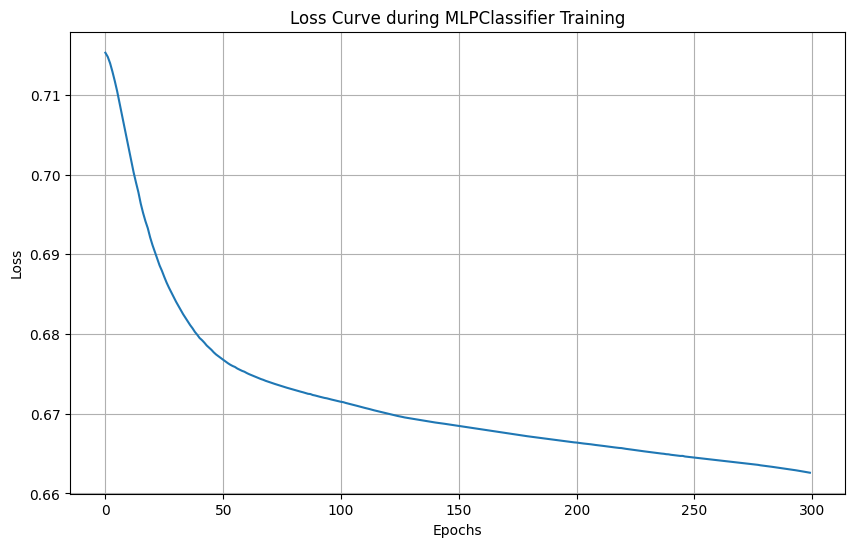

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve during MLPClassifier Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Create an MLPClassifier instance
mlp_gs = MLPClassifier(random_state=42, verbose=True) # Added random_state for reproducibility

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=mlp_gs, param_grid=param_grid, n_jobs=-1, cv=3, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Iteration 1, loss = 0.68565300
Iteration 2, loss = 0.68783287
Iteration 3, loss = 0.67826412
Iteration 4, loss = 0.68157956
Iteration 5, loss = 0.67349743
Iteration 6, loss = 0.67478473
Iteration 7, loss = 0.67472999
Iteration 8, loss = 0.67100301
Iteration 9, loss = 0.66785797
Iteration 10, loss = 0.66850670
Iteration 11, loss = 0.66557312
Iteration 12, loss = 0.66476237
Iteration 13, loss = 0.66379241
Iteration 14, loss = 0.66370273
Iteration 15, loss = 0.66202051
Iteration 16, loss = 0.66130412
Iteration 17, loss = 0.66210165
Iteration 18, loss = 0.66194101
Iteration 19, loss = 0.66024007
Iteration 20, loss = 0.65853469
Iteration 21, loss = 0.65879593
Iteration 22, loss = 0.65843016
Iteration 23, loss = 0.65643061
Iteration 24, loss = 0.65614698
Iteration 25, loss = 0.65665080
Iteration 26, loss = 0.65497730
Iteration 27, loss = 0.65178498
Iteration 28, loss = 0.65085797
Iteration 29, loss = 0.65063445
Iteration 30, loss

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
predictions_gs = grid_search.predict(X_test)
print("Predictions:", predictions_gs)

Predictions: [0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1
 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 1 1 0 1]


In [64]:
accuracy = accuracy_score(y_test, predictions_gs)
print("Accuracy:", accuracy)
print(classification_report(y_test, predictions_gs))

Accuracy: 0.775
              precision    recall  f1-score   support

           0       0.76      0.75      0.75        55
           1       0.79      0.80      0.79        65

    accuracy                           0.78       120
   macro avg       0.77      0.77      0.77       120
weighted avg       0.77      0.78      0.77       120



## #2- Regression with MLP and input data standardization


In [66]:
# 1. Imports
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# -----------------------------
# 2. Load data and inspect size
# -----------------------------
housing = fetch_california_housing()

X = housing.data      # features
y = housing.target    # targets (house prices)

print("X shape:", X.shape)  # (n_samples, n_features)
print("y shape:", y.shape)  # (n_samples,)
print("First 5 rows of X:\n", X[:5])
print("First 5 values of y:\n", y[:5])

X shape: (20640, 8)
y shape: (20640,)
First 5 rows of X:
 [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
First 5 values of y:
 [4.526 3.585 3.521 3.413 3.422]


In [68]:
# ------------------------------------------
# 3. Mean-variance standardization of X and y
# ------------------------------------------

# For X: mean and std per feature (axis=0)
X_mean = np.mean(X, axis=0)
X_std_dev = np.std(X, axis=0)
X_std = (X - X_mean) / X_std_dev

# For y: mean and std (scalar)
y_mean = np.mean(y, axis=0)
y_std_dev = np.std(y, axis=0)
y_std = (y - y_mean) / y_std_dev

print("\nX_std mean (per feature):", np.mean(X_std, axis=0))
print("X_std std  (per feature):", np.std(X_std, axis=0))
print("y_std mean:", np.mean(y_std))
print("y_std std :", np.std(y_std))


X_std mean (per feature): [ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
X_std std  (per feature): [1. 1. 1. 1. 1. 1. 1. 1.]
y_std mean: 2.0379907924902098e-16
y_std std : 1.0


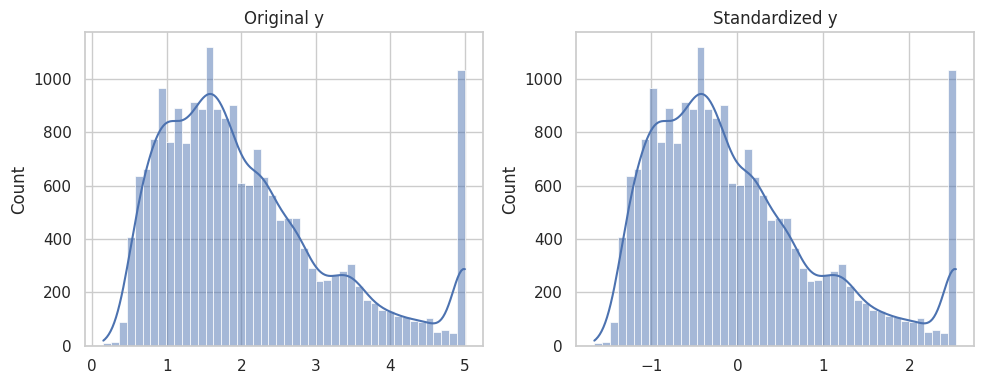

In [69]:
# -------------------------------------------------
# 4. Plot histograms of original y and standardized y
# -------------------------------------------------
sns.set(color_codes=True)
sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))

# Original y
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True)
plt.title("Original y")

# Standardized y_std
plt.subplot(1, 2, 2)
sns.histplot(y_std, kde=True)
plt.title("Standardized y")

plt.tight_layout()
plt.show()

In [70]:
# -------------------------------------------------------
# 5. Train / test split on standardized data (ratio = 0.3)
#    Also get original y split so we can evaluate in real scale
# -------------------------------------------------------
X_std_train, X_std_test, y_std_train, y_std_test, y_train, y_test = train_test_split(
    X_std,
    y_std,
    y,               # original targets
    test_size=0.3,
    random_state=1
)

print("\nTrain shapes:")
print("X_std_train:", X_std_train.shape)
print("y_std_train:", y_std_train.shape)

print("\nTest shapes:")
print("X_std_test :", X_std_test.shape)
print("y_std_test :", y_std_test.shape)



Train shapes:
X_std_train: (14448, 8)
y_std_train: (14448,)

Test shapes:
X_std_test : (6192, 8)
y_std_test : (6192,)


In [71]:
# --------------------------------------------
# 6. Initialize MLPRegressor with given params
# --------------------------------------------
mlp = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(10, 100),
    alpha=0.001,
    random_state=20,
    early_stopping=False
)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


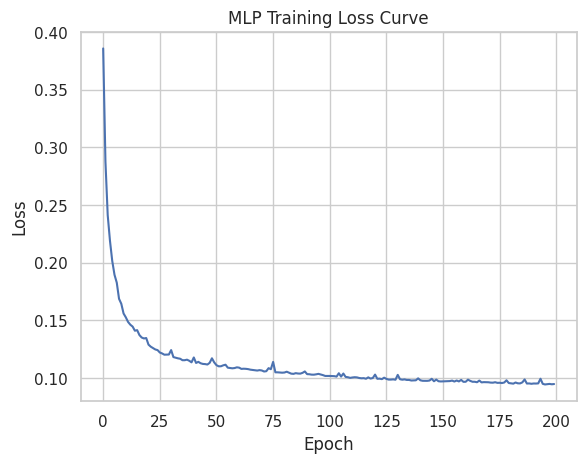

In [72]:
# ------------------------------
# 7. Train the model (fit)
# ------------------------------
mlp.fit(X_std_train, y_std_train)

# ------------------------------
# 8. Plot the training loss curve
# ------------------------------
plt.figure()
plt.plot(mlp.loss_curve_)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MLP Training Loss Curve")
plt.grid(True)
plt.show()


In [73]:
# -----------------------------------
# 9. Make predictions on the test set
# -----------------------------------
y_pred_std = mlp.predict(X_std_test)  # predictions in standardized scale


In [74]:
# -----------------------------------------------------
# 10. Transform predictions back to original target scale
#     z = z_std * std(z) + mean(z)
# -----------------------------------------------------
y_pred_real = y_pred_std * y_std_dev + y_mean

In [75]:

# -------------------------------------------
# 11. Evaluate using RMSE and Relative RMSE
# -------------------------------------------
# We compare original test targets (y_test) with transformed predictions
# y_test is already in real scale because we split it above together with X_std

mse = mean_squared_error(y_test, y_pred_real)
rmse = np.sqrt(mse)

# One common definition: Relative RMSE = RMSE / mean of actual values
relative_rmse = rmse / np.mean(y_test)

print("\nMSE:", mse)
print("RMSE:", rmse)
print("Relative RMSE (RMSE / mean(y_test)):", relative_rmse)


MSE: 0.28211824728930307
RMSE: 0.5311480464892091
Relative RMSE (RMSE / mean(y_test)): 0.2591024509940269


### Predicting a new example

In [76]:
# ================================
# Predicting a new example (regression)
# ================================

# Example: one new house (you can change these numbers)
# Order of features in California housing:
# [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
new_house = np.array([[3.5,   # MedInc
                       25.0,  # HouseAge
                       5.0,   # AveRooms
                       1.0,   # AveBedrms
                       1500,  # Population
                       3.0,   # AveOccup
                       34.5,  # Latitude
                       -118.0 # Longitude
                      ]])

print("New house raw features shape:", new_house.shape)

# 1) Standardize the input using the SAME mean and std used for X_std
new_house_std = (new_house - X_mean) / X_std_dev

# 2) Predict in the standardized target space
y_new_std = mlp.predict(new_house_std)

# 3) Transform prediction back to the original target scale
y_new_real = y_new_std * y_std_dev + y_mean

print("Predicted (standardized) target:", y_new_std)
print("Predicted house value (original scale):", y_new_real)


New house raw features shape: (1, 8)
Predicted (standardized) target: [-0.63474078]
Predicted house value (original scale): [1.33611288]
